## Data Exploration ##
The goals of Data Exploration are to identify what data you have and what is usable, identify issues such as missing values and outliers, and to form ideas of new features that could be calculated (Feature Engineering). Later on we'll use the knowledge that we gain during Data Exploration to decide which data transformations to perform.

    - `Pandas` is a library that's used for working with data, e.g. displaying it and doing data transformations.
    - `Numpy` is a library to work with arrays and for calculations.
    - `Sklearn` is the standard Python library for machine learning. It provides many unsupervised and supervised learning algorithms.
    - `Seaborn` is a Python data visualization library based on matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load the training data ####

We'll split this into train and test later. All these type of data operations are handled by the Pandas library (named `"pd"` here)

In [2]:
alldata = pd.read_csv('./housesales.csv')

#### Check how much data we have ####
Is the dataset large enough to train a model?

In [3]:
alldata.shape

(1460, 81)

This shows that there are 1460 rows, which at first sight looks like a good enough to train an initial model. The data is not extensive enough for production use but would help establish a good baseline. We also see that there are 80 input features that we can potentially use to predict our target variable.

#### Review the target attribute: `SalePrice` ####
Before we look at the input features, let's have a close look at our Target attribute: `SalePrice`.
First, let's display some values. The `[:10]` selects only the first 10 rows.

In [4]:
alldata['SalePrice'][:10]

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

#### Check if there are any empty values ####

In [5]:
alldata['SalePrice'].isnull().sum()

0

#### Let's check the price range ####

In [6]:
minPrice = alldata['SalePrice'].min()
maxPrice = alldata['SalePrice'].max()

print('Min Sales Price (%d) - Max Sales Price (%d)' % (minPrice,maxPrice))

Min Sales Price (34900) - Max Sales Price (755000)


This tells us that *SalePrice* is an integer and has numbers in the range that we would expect from house prices. There are no empty values. We could see however that the price range is very wide from a 34900 up to 755000. This would require to scale the price to allow the algorithm to learn better.

#### Which columns will we select as input features for our model? ####

Let's start by listing all the columns.

In [7]:
alldata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Separate the columns into numerical and categorical ####

Let's get a list of all numeric features first.

In [8]:
alldata.select_dtypes(include=np.number).columns.tolist()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

As we can see there are too many, maybe more useful will be to separate them and see only the numerical and the categorical ones.

#### Show a sample of numerical columns ####

Now that we see the numeric columns we could also show a sample to get some impression about the data.

In [9]:
alldata.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


#### Show a list of categorical columns ####

We could do the same for all categorical variables, notice this time we use the property `exclude` in the `select_dtypes` function...

In [10]:
alldata.select_dtypes(exclude=np.number).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

#### Show a sample of categorical variables ####

In [11]:
alldata.select_dtypes(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### What can we conclude about the columns? ####

There are many input features that we could potentially use. Some of these columns are self explanatory, others not so much. To understand what each column means, have a look at [data_description.txt](./files/data-description.txt) for background.

#### Which columns would we select intuitively? ####

To start with, let's first take an intuitive approach. Ask yourself:

   "Which of these columns is likely of value to predict Sale Price?"
   "Which factors of a house would I look at yourself when making a buying decision?"
   "Is enough information available in these columns, are there any empty values?"

   Imagine that we've decide that we believe the following features are relevant: `GrLivArea` size of living area, `TotalBsmtSF` size of basement, `OverallQual` overall quality category, `YearBuilt` year house was built `MSZoning` A=Agriculture, C=Commercial, RH=Residential High Density, etc.

#### Are the columns we intuitively selected also actually correlated with the Sale Price? ####

Let's test our theories that these input features are correlated with Sale Price. We'll start with the numerical variables first: `GrLivArea`, `TotalBsmtSF`, `OverallQual` and `YearBuilt`.
   Because all of these are numerical continuous attributes, we can use scatter plots here.

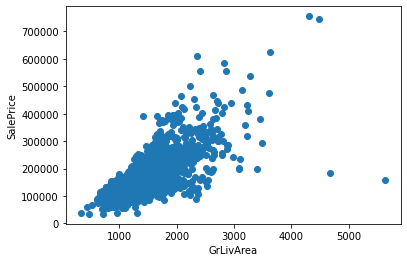

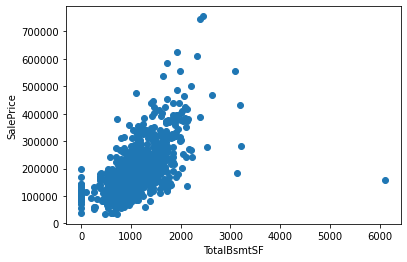

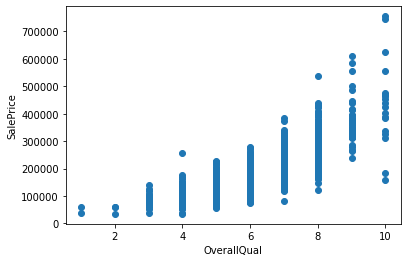

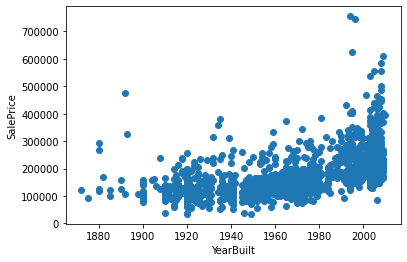

In [12]:
plot.scatter(alldata.GrLivArea, alldata.SalePrice)
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.TotalBsmtSF, alldata.SalePrice)
plot.xlabel("TotalBsmtSF")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.OverallQual, alldata.SalePrice)
plot.xlabel("OverallQual")
plot.ylabel("SalePrice")
plot.show()
plot.scatter(alldata.YearBuilt, alldata.SalePrice)
plot.xlabel("YearBuilt")
plot.ylabel("SalePrice")
plot.show()

We can conclude that:
    `GrLivArea`: There is a linear correlation with `SalePrice`; We can draw a straight line from the bottom-left to the top-right.
    `TotalBsmtSF`: It appears to be an relationship between `TotalBsmtSF` and `SalePrice` too but not that obvious. It seems a higher basement sizes lead to higher prices but we could notice that there are some outliers.
    `OveralQual`: As expected, there is a higher sales price when overal quality perception is higher. But that is not nessary for the entire price range. Probably the quality of the house is not enough and the price would depend on the location or the zoning as well.
    `YearBuilt`: This relationship is a little less obvious, but there's a trend for higher prices for more recent construction.
    These attributes appear to be of predictive value and we definitely want to keep them in our training set!
    On another note, we see several `outliers`. In particular, the attribute `GrLivArea` shows that there are some houses with exceptionally large living areas given their price. We could notice this also for the `TotalBsmtSF`. Generally it is recommended to build the initial model with all the available values first and then start removing outliers to see if this would improve the prediction and make the model generalize better.

#### Is the categorical attribute `MSZoning` also correlated with `SalePrice`? ####

This attribute contains the type of property (`A=Agriculture`, `C=Commercial`, `RH=Residential High Density`, et cetera). Correlation between a categorical and a continuous attribute (SalePrice) can be visualized as a boxplot.

(-0.5, 4.5, 0.0, 800000.0)

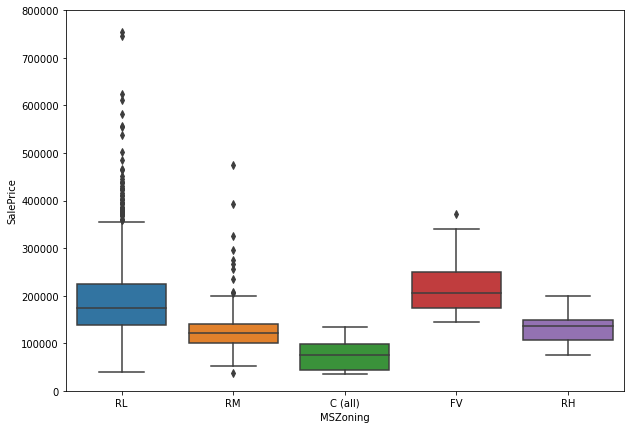

In [13]:
var = 'MSZoning'
data = pd.concat([alldata['SalePrice'], alldata[var]], axis=1)
f, ax = plot.subplots(figsize=(10, 7))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

What can we conclude from this? The boxplots for the various types of properties look very different. From the plot we could see that the residential areas seems to be more expensive as expected than commercial but the price range is high. So, again, MSZoning appears to contain important
   information to predict the price.

#### What is the relationship between Neighborhood and SalePrice? ####

Let's explore also the relationship of the Neighborhood to the price. We can plot the data using the same technique.

(-0.5, 24.5, 0.0, 800000.0)

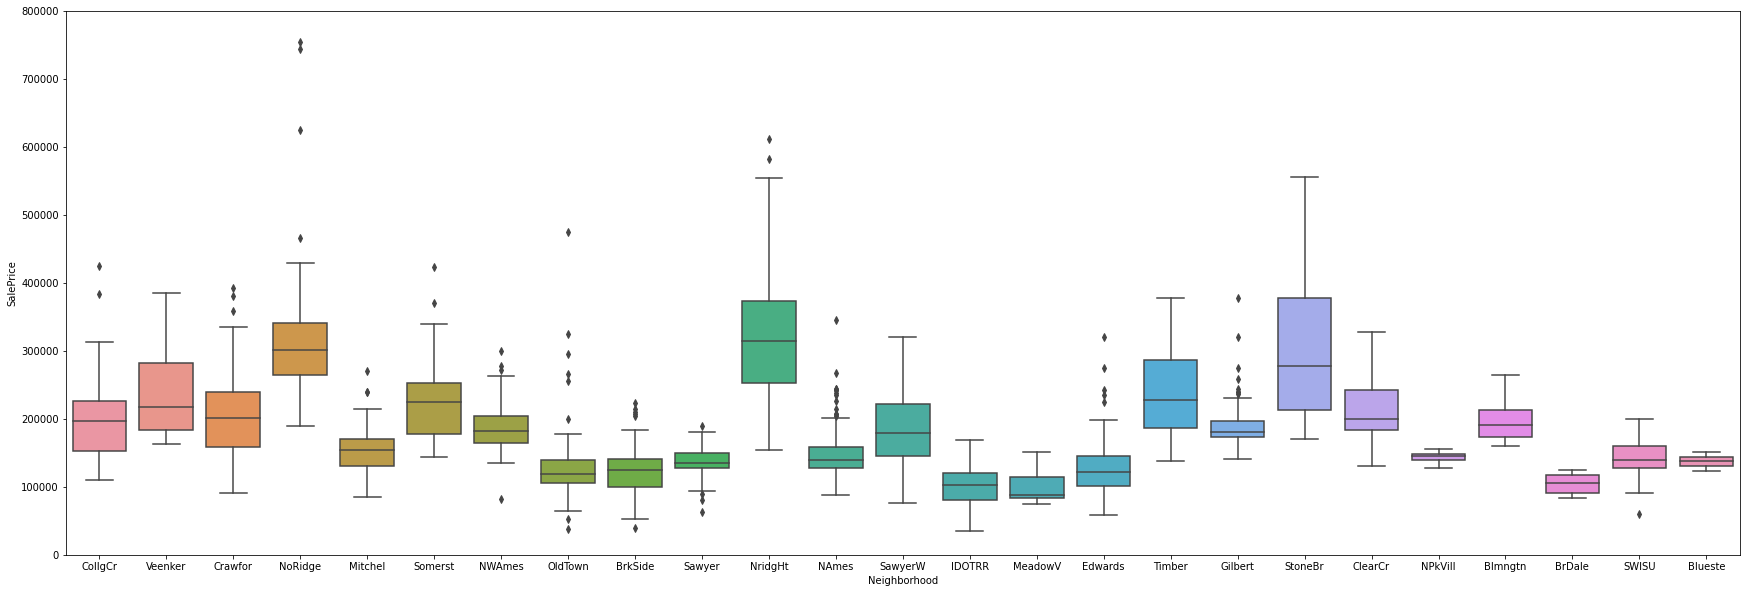

In [14]:
var = 'Neighborhood'
data = pd.concat([alldata['SalePrice'], alldata[var]], axis=1)
f, ax = plot.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

The plot is not necessary conclusive, but it appears that as expected some areas are more expensive than others. As such we should keep this columns and use it in the model. Notice that some areas shown very large range of prices and spikes like `NridgHt` or `StoneBr` or very large outliers like in `NoRidge` with prices more than double as the usual range for that neighborhood. After the initial model build you could try to remove these outliers and test if the model would have better performance.

#### A different approach: Systematically checking for correlation between input features and our target ####

It becomes clear that manually investigating all of the attributes this way is very time consuming. Therefore, let's take a more systematic approach. Ideally, we would like to see the correlation between all input attributes and the target `SalePrice`.

In [15]:
corr = alldata.corr(method='spearman')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

The conclusion is that our intuition of thinking that `TotalBsmtSF`, `OverallQual`, `GrLivArea` and `YearBuilt` are of importance, was correct. However, there are other features listed as high correlation, such as `GarageCars`, `GarageArea` and `Fullbath`.

   Here's a list  of the features that are most correlated with our target:
    - `OverallQual`: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
    - `GrLivArea`: Above grade (ground) living area square feet
    - `GarageCars`: Size of garage in car capacity
    - `GarageArea`: Size of garage in square feet
    - `TotalBsmtSF`: Total square feet of basement area
    - `1stFlrSF`: First Floor square feet
    - `FullBath`: Full bathrooms above grade
    - `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
    - `YearBuilt`: Original construction date

#### Is there data missing from some of the columns? ####

Many machine learning models are unable to handle missing data. We have to find out how much data is missing.

   At the moment of replacing missing data, we should first find out whether that would cause some kind of distortion in the data and have a negative effect on model quality.

   Therefore, we have to see if the missing data follows certain patterns.

   Check how many Empty values each column has, and compute the percentage of the total number of rows.

In [16]:
total = alldata.isnull().sum().sort_values(ascending=False)
percent = (alldata.isnull().sum()/alldata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


There are a lot of attributes with missing values. This is especially the case for attributes `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `FireplaceQu`.

#### Let's investigate the attributes with most missing values in detail ####

Have a look at the [data description](files/data-description.txt) for these columsn in particular. The description of the attribute `PoolQC` (pool quality) is as follows:

    - `Ex - Excellent`
    - `Gd - Good`
    - `TA - Average/Typical`
    - `Fa - Fair`
    - `NA - No Pool`

   It seems sensible to assume that most houses don't have pools and therefore missing values simply mean `"No Pool"`. Therefore we make a note to replace those missing values with `"NA"`.
   Similarly, we make a note to replace the missing values for `MiscFeature`, `Alley`, `Fence` and `FireplaceQu` with `"NA"`.

   The next attribute with many hidden values is `LotFrontage`, which means `"Linear feet of street connected to property"`. This is a continuous measure, and we choose that we will replace missing values by with the mean of the existing values. We'll see more of this in the Data Preparation stage.

#### Check the distribution of the Target variable ####

It's important that the target variable follows Normal Probability distribution. If it does not, this will negatively impact the model's performance. We can check for this using a histogram, and including a normal probability plot. The Seaborn library does this for us.

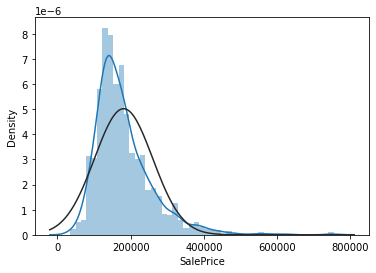

<Figure size 432x288 with 0 Axes>

In [17]:
sns.distplot(alldata['SalePrice'], fit=norm);
fig = plot.figure()

We can conclude from this that the values of the Target variable currently deviate from the Normal Distribution. You see that it is left skewed. The regression algorithms that we will use later on has problems with such a distribution. We will have to address this problem.

## Data Preparation ##

During Data Exploration, we have realized that several changes must be made to the dataset. Data Preparation is a logical result of Data Exploration; we will now take action based on the insights that we gained earlier.

#### Update missing values ####

In the previous topic (identifying Missing Values) we made the decision that:

We want to replace the missing values of `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `FireplaceQu` with `"NA"`.
We will replace missing values of `LotFrontage` with the mean of the existing values. Let's do this:


In [18]:
alldata = alldata.fillna({"PoolQC": "NA"})
alldata = alldata.fillna({"MiscFeature": "NA"})
alldata = alldata.fillna({"Alley": "NA"})
alldata = alldata.fillna({"Fence": "NA"})
alldata = alldata.fillna({"FireplaceQu": "NA"})
meanlot = alldata['LotFrontage'].mean()
alldata = alldata.fillna({"LotFrontage": meanlot})
alldata = alldata.dropna()

#### Handling Outliers ####

   Do you remember that the scatter chart for `GrLivArea` showed several outliers? Let's remove these two outliers, by identifying the houses with the highest `GrLivArea`.

   Show the IDs of the houses with the highest GrLivArea.

In [19]:
alldata.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NA,NA,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,...,0,NA,NA,NA,0,10,2007,New,Partial,184750


#### Remove the Outliers ####

We are also plotting the chart again to check that the outliers have disappeared.

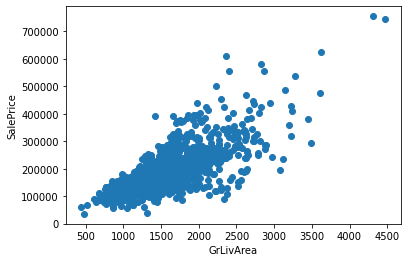

In [20]:
alldata = alldata.drop(alldata[alldata['Id'] == 1299].index)
alldata = alldata.drop(alldata[alldata['Id'] == 524].index)
plot.scatter(alldata.GrLivArea, alldata.SalePrice)
plot.xlabel("GrLivArea")
plot.ylabel("SalePrice")
plot.show()

You notice that those outliers have disappeared.

#### Handling the skewed distribution of the Target variable ####

Do you remember that the histogram of `SalePrice` showed a positive skew? We can solve this problem by converting the target variable. We use a `-log-` transformation to make the variable fit normal distribution. Let's make the log transformation and show the histogram again to check the result.

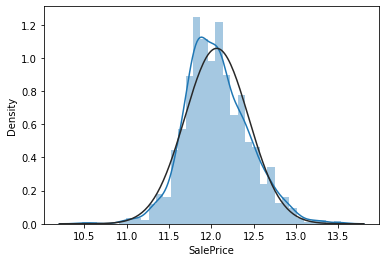

<Figure size 432x288 with 0 Axes>

In [21]:
y = np.log(alldata['SalePrice'])
sns.distplot(y, fit=norm)
fig = plot.figure()

You will notice that the sales price now follows a normal distribution. We will use the newly created `y` variable later to fit our model.

#### Removing irrelevant features ####

In any case we will remove the ID column, which does not carry any predictive value. We will also remove the attributes that showed very low correlation with `SalePrice` during Data Exploration. Note that this is a fairly brute approach, but it is again sufficient for our exercise. After the first model build, you could start adding back some of the features and observe if the model will generalize better.

In [22]:
alldata.drop("Id", axis = 1, inplace = True)
alldata.drop("BsmtFullBath", axis = 1, inplace = True)
alldata.drop("BsmtUnfSF", axis = 1, inplace = True)
alldata.drop("ScreenPorch", axis = 1, inplace = True)
alldata.drop("MoSold", axis = 1, inplace = True)
alldata.drop("3SsnPorch", axis = 1, inplace = True)
alldata.drop("PoolArea", axis = 1, inplace = True)
alldata.drop("MSSubClass", axis = 1, inplace = True)
alldata.drop("YrSold", axis = 1, inplace = True)
alldata.drop("BsmtFinSF2", axis = 1, inplace = True)
alldata.drop("MiscVal", axis = 1, inplace = True)
alldata.drop("LowQualFinSF", axis = 1, inplace = True)
alldata.drop("OverallCond", axis = 1, inplace = True)
alldata.drop("KitchenAbvGr", axis = 1, inplace = True)
alldata.drop("EnclosedPorch", axis = 1, inplace = True)


#### Separating Target and Input Features ####

Scikit Learn expects that we deliver the data for training in two parts:

- A dataset with a single column, the target, in this case `SalePrice`. We did this already earlier by taking the `log` of the `SalePrice` and storing it in `"y"` variable.
- A dataset with all the input columns, in this case all columns apart from `SalePrice`. We will place this in variable "X".

Get all the data with the exception of the `SalePrice` and place it in variable X:

In [23]:
X = alldata.drop(['SalePrice'], axis=1)

#### Convert categorical values to numbers ####

Most ML algorithms can only work with numbers. Therefore we should convert categories to numbers first.

For all attributes we will assume that they are Nominal (as opposed to Ordinal), meaning that there's no order/sequence in the values that it can take. The go-to method to encode Nominal categorical values is Onehot Encoding. This will convert each separate value of a category into its own column that can take a value of 1 or 0. The Pandas `get_dummies` function does OneHot encoding.

You will see that after this the `SaleType` column has been converted into `SaleType_ConLw`, `SaleType_New`, et cetera. The dataset now only has numerical values.


In [24]:
X = pd.get_dummies(X)
X.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.000000,8450,7,2003,2003,196.0,706,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80.000000,9600,6,1976,1976,0.0,978,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68.000000,11250,7,2001,2002,162.0,486,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,60.000000,9550,7,1915,1970,0.0,216,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,84.000000,14260,8,2000,2000,350.0,655,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0
5,85.000000,14115,5,1993,1995,0.0,732,796,796,566,...,0,0,0,1,0,0,0,0,1,0
6,75.000000,10084,8,2004,2005,186.0,1369,1686,1694,0,...,0,0,0,1,0,0,0,0,1,0
7,70.049958,10382,7,1973,1973,240.0,859,1107,1107,983,...,0,0,0,1,0,0,0,0,1,0
8,51.000000,6120,7,1931,1950,0.0,0,952,1022,752,...,0,0,0,1,1,0,0,0,0,0
9,50.000000,7420,5,1939,1950,0.0,851,991,1077,0,...,0,0,0,1,0,0,0,0,1,0


## Building the model ##

We will build a simple Linear Regression model. We will use the Scikit-Learn library for this.

#### Split Train and Test data so we can validate the model later ####

After building the model, we will want to test its performance against new data. It's important that this data has not been seen before during the model training. To achieve this we have to reserve part of our dataset for testing, which will be removed from the training phase.

We'll reserve 20% of the total dataset for testing. The random_state variable is for initializng the randomizer. By hardcoding it here we make sure that we select the same records everytime that we run the script.

After this we will have 4 variables:
- `X_train`: The input features of the training dataset.
- `X_test`: The input features of the test dataset.
- `y_train`: The target of the training dataset.
- `y_train`: The target of the test dataset.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63, test_size=.20)

#### Build the model ####

Now we're ready to build the model (on the training data only). Building the model is also called "fitting".

In [26]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

#### Verifying the model ####

How accurate is our model? We will use the Test dataset for this.

First apply the predictions on the Test dataset

In [27]:
y_predicted = model.predict(X_test)

#### Look at the prediction of one particular house ####
From the given test set we get the data of one house and check the predicted value.

In [28]:
y_predicted[0]

11.99231935452456

You would notice that the price above is strange, it shows a number that doesn't seem to be a normal house Sales Price. If you remember we scaled the SalePrice by using `np.log(SalePrice)` to get the prices in smaller range and help the algorithm generalize and learn better. To get the real price now we need to revert back this scale. To do so we have to use `np.exp`.

In [29]:
np.exp(y_predicted[0])

161509.51794053038

That looks more like a house price in real life!

#### An intuitive, visual approach to verification ####

To verify the quality of the predictions, let's first use an intuitive visual approach, which works well for linear regression models. For this we will display in one plot:

- a. The actual `SalePrice` (according to the original data in the Test dataset)
- b. The predicted `SalePrice` (the value according to our model)

We're plotting this as a scatter.

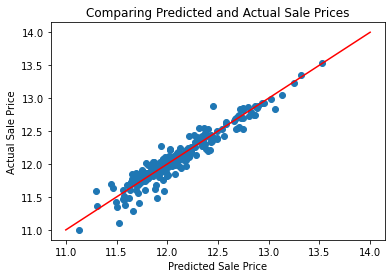

In [30]:
plot.scatter(y_predicted, y_test)
plot.xlabel('Predicted Sale Price')
plot.ylabel('Actual Sale Price')
plot.title('Comparing Predicted and Actual Sale Prices')
plot.plot(range(11, 15), range(11, 15), color="red")
plot.show()

In ideal circumstances we'd like to see the predictions falling on the line of actual values. This would mean that Predicted and Actual Sale Prices are the same. In our case, although the points are not oriented in a perfectly straight line, the model appears to be fairly accurate.

#### A measurable approach to verification ####

How can we express the accuracy of the model in a more mathematical way? For that we use a quality metric, in this case we could use [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation).

`RMSE` measures the distance between the predictions and the actual values. A lower value for RMSE means a higher accuracy.

RMSE by itself is not easy to interpret, but it can be used to compare different versions of a model, to see whether a change you've made has resulted in an improvement. Scikit-Learn has a function to calculate RMSE.

In [31]:
print('RMSE: ', mean_squared_error(y_test, y_predicted))

RMSE:  0.012609759703154812


## Congratulations ##

Congratulations on finishing the lab until this point. 
You can now continue with the steps to store the model in the catalog and deploy it.